In [3]:
# Problem Statement : Implement Feedforward neural networks with Keras and TensorFlow MNIST Digit dataset

In [8]:
# install libraries
!pip3 install scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached Pillow-10.1.0-cp310-cp310-macosx_11_0_arm64.whl (3.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl (66 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
# import all the above libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [10]:
# read dataset 
"""
or you can use this if you have downloaded the dataset locally
NOTE : if you have mnist_784.csv : 
       in this dataset image are represented in as 1d array . 
       you need to reshape this into ( 28, 28 )

1. df = pd.read_csv('mnist_784_csv.csv')

2. x=df.drop(['class'], axis=1)
   y=df['class'].values

3. x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

4. image_shape = (28,28)

5.  BUILD : the model using keras.Sequential()

    model = keras.Sequential([
     keras.layers.Flatten(input_shape=(784,)),
     keras.layers.Dense(256,activation='relu'),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(32,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ])

6.  COMPILE :  
    
    model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

7.  TRAIN : using train dataset x_train , y_train 
    
    history = model.fit(x_train, y_train, epochs=10)

    // history object have keys : loss , accuracy : these are w.r.t training data  
    //                            val_loss , val_accuracy : these are w.r.t to testing data
    
8.  TEST : test the model using model.evaluate(x_test, y_test)
    
    test_loss, test_accuracy = model.evaluate(x_test,y_test)

9.  Reshape the test data : since we want to plot to 2d 
    x_test_img = x_test.to_numpy().reshape(x_test.shape[0],28,28)
    plt.imshow(x_test_img[0])

10. PREDICT : from the random test value we will predict using the model.predict
    n=random.randint(0,500)
    plt.imshow(x_test_img[n])
    predicted_value = model.predict(x_test)
    print(np.argmax(predicted_value[n]))

11. PLOT THE graph loss and accuracy : training data 
    plt.plot(history.history['loss'],label='loss',color='g')
    plt.plot(history.history['accuracy'],label='accuracy',color='b')
    plt.legend()
    plt.show()

CONCLUSION: AS MODEL EPOCHS INCREASES , MODEL ACCURACY INCREASE AND LOSS DECREASES. 

"""
mnist = tf.keras.datasets.mnist

# split into train and test 
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [13]:
# describe dataset 
print("length of training dataset : {0} and dimension of dataset {1} ".format(len(x_train),x_train.shape)) 
print("length of testing dataset : {0} and dimension of dataset {1} ".format(len(x_test),x_test.shape)) 


length of training dataset : 60000 and dimension of dataset (60000, 28, 28) 
length of testing dataset : 10000 and dimension of dataset (10000, 28, 28) 


In [15]:
# check the first image 
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

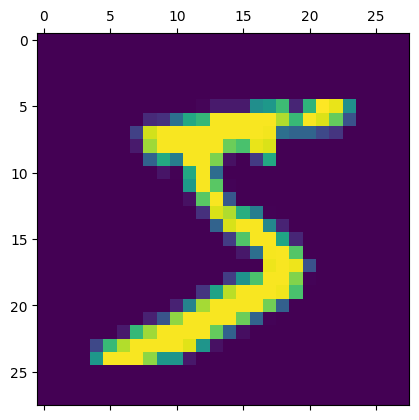

In [16]:
plt.matshow(x_train[0])

In [17]:
# normalising the data 
x_train = x_train /255 
x_test = x_test /255

In [20]:
# create model 
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)), # reshaping data from 2d to 1d 
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ])


In [21]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)), # first layer is the input layer where we are feeding the image. Flatten: we are reshaping the data from 2d to 1d.     
  # dense layer : ensure that each neuron in the previous layer is connected to the each neuron to the next layer.
 keras.layers.Dense(128,activation='relu'), # dense layer 
 keras.layers.Dense(10,activation='softmax') # output layer. 
])

In [22]:
model.compile(optimizer='sgd',
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [24]:
# train the model 
history = model.fit(x_train , y_train, validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 476us/step - loss: 0.3376 - accuracy: 0.9063 - val_loss: 0.2912 - val_accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 1s 462us/step - loss: 0.2884 - accuracy: 0.9195 - val_loss: 0.2602 - val_accuracy: 0.9261
Epoch 3/10
1875/1875 [==============================] - 1s 459us/step - loss: 0.2573 - accuracy: 0.9280 - val_loss: 0.2372 - val_accuracy: 0.9327
Epoch 4/10
1875/1875 [==============================] - 1s 468us/step - loss: 0.2337 - accuracy: 0.9348 - val_loss: 0.2186 - val_accuracy: 0.9388
Epoch 5/10
1875/1875 [==============================] - 1s 469us/step - loss: 0.2150 - accuracy: 0.9400 - val_loss: 0.2026 - val_accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 1s 476us/step - loss: 0.1993 - accuracy: 0.9447 - val_loss: 0.1908 - val_accuracy: 0.9464
Epoch 7/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.1857 - accuracy: 0.9482 - val_loss: 0.1795 -

In [25]:
# evaluate the model 
test_loss , test_acc = model.evaluate(x_test,y_test)
print(f"Loss : {test_loss}")
print(f"Accuracy: {test_acc}")

313/313 [==============================] - 0s 340us/step - loss: 0.1543 - accuracy: 0.9552
Loss : 0.1543286293745041
Accuracy: 0.9552000164985657


value of n : 5515


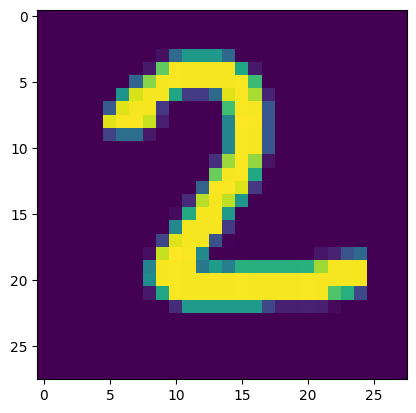

In [32]:
# make prediction on new data 
n = random.randint(0,9999) # choose the random value from the testing data 
print("value of n : {}".format(n))
plt.imshow(x_test[n]) # this is the random test image 
plt.show()

In [34]:
# predict the model using testing data  
predicted_value = model.predict(x_test)
# print("Predicted value array : {0}".format(predicted_value))
print("Handwritten number : %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 301us/step
Handwritten number : 2


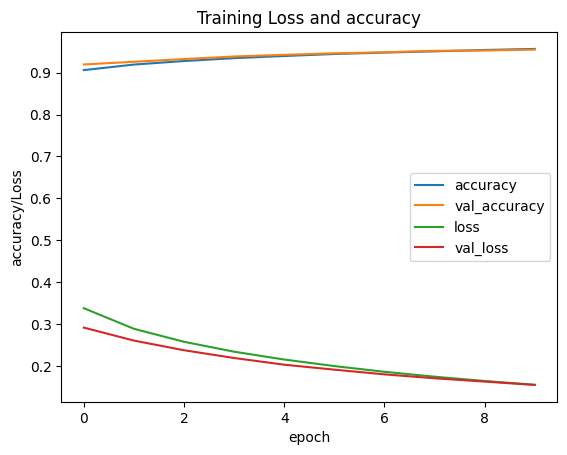

In [36]:
# plot the graph 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()
#------------------------- done ---------------------------

In [ ]:
# filter dataset 
# """
# - drop the "class" column and store inside the variable x .
# - store the numpy array values of "class" column inside variable x. 
# """

In [ ]:
# split into training and testing 


# NORMALIZING DATA : scale downing the value between (0-1)
# This helps to speed up the training and reduces the chance of stuck in the local optimum.

In [ ]:
# image shape 

In [ ]:

# """
# Sequential : allows to build model layer by layer. create network one after other. 
# """
# model = keras.Sequential([
#  keras.layers.Flatten(input_shape=(28,28)), # first layer is the input layer where we are feeding the image. Flatten: we are reshaping the data from 2d to 1d.     
#  keras.layers.Dense(256,activation='relu'), # dense layer : ensure that each neuron in the previous layer is connected to the each neuron to the next layer.
#  keras.layers.Dense(128,activation='relu'), # dense layer 
#  keras.layers.Dense(32,activation='relu'),  # dense layer
#  keras.layers.Dense(10,activation='softmax') # output layer. 
# ])

In [ ]:
# compile code 
# OPTIMIZER : use stoichiomatic gradient descent, controls the learning rate.
# It saves time and computation. uses single integer rather than whole vector.
# Its lower the score means model is performing better. 
# model.compile(optimizer='sgd',
#  loss="sparse_categorical_crossentropy",
#  metrics=["accuracy"])

In [ ]:
# train model 
# using history = model.fit() method
# history object will contain all the values such as loss and accuracy, etc.
# set epochs = 10  :  EPOCHS : No of time the model will cycle through the data . (re-iterate)
# more the number of epochs , less will be the error and model will improve. 

In [ ]:
# evaluate model
# using "model.evaluate()", it will compute test loss and test accuracy on the testing dataset.
# for evaluation : passing testing dataset
# loss and accuracy 

In [ ]:
# now we want to make prediction on new dataset 

# lets say we are generating new data 

# predicted_value =  model.predict() : is used to do the prediction on testing set .
# np.argmax() : will choose the maximum value along the axis.

In [ ]:
# Now , after this we want to plot the graph for ACCURACY and LOSS 

In [ ]:
# history object contains : [ loss, accuracy , val_loss , val_accuracy]
# loss and accuracy : are w.r.t to training dataset
# val_loss and val_accuracy : are w.r.t to testing dataset

In [4]:
# plot : combine the graph 